# **Penguins Project**

## Project Setup

In this project, we will be exploring the "palmer_penguins.csv" data set, which contains a variety of raw data relating to different species of penguins. Our goal is to create several models that perform different methods of predicting the species of a given penguin based on a certain set of characteristics. 

**The overall outline of the project will be:**
1. Import and clean the data.
2. Explore the data set through various visual models.
3. Perform analysis on our desired features for our modeling.
4. Create three different models and test their prediction of the species on a test set.

## Data Import and Cleaning

First, We must import our standard imports (numpy, pandas, pyplot) we will use throughout the project. We will also import the penguins data set.

In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
url = "C:/Users/15598/Downloads/palmer_penguins (1).csv"
penguins = pd.read_csv(url)

We must separate our data into training and test sets and perform our preprocessing by importing train_test_split and preprocessing from sklearn.

We will split the data with a test size of 20% to ensure that we do not overfit the training data or lack enough data to accurately create our models.


In [93]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import datetime
np.random.seed(1234)

train,test=train_test_split(penguins,test_size=.2)

For the preprocessing, we are going to prepare the data in a manner useful for our analysis later. For example, the SEX values need to be changed to numbers, and some NAN values also need to be canceled.

In [94]:
def prep_data(data):
    df=data.copy()
    
    df["Species"]=df["Species"].str.split().str.get(0)
    
    recode={
    "MALE":"m",
    "FEMALE":"f",
    np.nan:"unknown",
    ".":"unknown"
    }
    df["Sex"]=df["Sex"].map(recode)
    
    
    
    df["Sex"] = df["Sex"].replace(np.nan, '', regex=True)
    
    
    le=preprocessing.LabelEncoder()
    df["Sex"]=le.fit_transform(df["Sex"])
    df["Clutch Completion"]=le.fit_transform(df["Clutch Completion"])
    df["Island"]=le.fit_transform(df["Island"])
    df["Species"]=le.fit_transform(df["Species"])
    col=["studyName","Sample Number","Stage","Individual ID",
         "Comments","Region","Date Egg"]
    df=df.drop(col,axis=1)
    df=df.dropna()
    df=df[df["Sex"]!=2]
    
    X=df.drop(["Species"],axis=1)
    y=df["Species"]
    return (X,y)

Perform the data prep on both the training data and the test data set to create X,y sets for both training and testing. 

In [95]:
X_train,y_train=prep_data(train)
X_test,y_test=prep_data(test)

## Exploratory Analysis

**For this part, this is Exploratory Analysis, we try to find the relationship among the measurements**

Below we will begin with analyzing the penguins data set as a whole, and  perform the same data preparation as above.

In [96]:

recode={
"MALE":"m",
"FEMALE":"f",
np.nan:"unknown",
".":"unknown"
}
penguins["Sex"]=penguins["Sex"].map(recode)
    
    
    
penguins["Sex"] = penguins["Sex"].replace(np.nan, '', regex=True)
    
    
le=preprocessing.LabelEncoder()
penguins["Sex"]=le.fit_transform(penguins["Sex"])
penguins["Clutch Completion"]=(le.fit_transform
                               (penguins["Clutch Completion"]))
penguins["Island"]=le.fit_transform(penguins["Island"])
penguins["Species"]=le.fit_transform(penguins["Species"])
col=["studyName","Sample Number","Stage","Individual ID",
     "Comments","Region","Date Egg"]
penguins=penguins.drop(col,axis=1)
penguins=penguins.dropna()
penguins=penguins[penguins["Sex"]!=2]


**We can display a full summary of count, mean, standard deviation, max, min, and percentiles of the data using the .describe() function**

In [99]:
penguins.describe()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,0.935185,0.632716,0.895062,44.053395,17.127469,201.216049,4213.966049,0.496914,8.739944,-25.688691
std,0.889636,0.706654,0.306948,5.480635,1.967385,13.958683,809.277529,0.500764,0.552073,0.790840
min,0.000000,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,7.632200,-27.018540
25%,0.000000,0.000000,1.000000,39.500000,15.575000,190.000000,3550.000000,0.000000,8.304440,-26.326780
50%,1.000000,0.500000,1.000000,44.950000,17.300000,197.000000,4050.000000,0.000000,8.658585,-25.842775
75%,2.000000,1.000000,1.000000,48.700000,18.600000,213.000000,4800.000000,1.000000,9.181477,-25.055572
max,2.000000,2.000000,1.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,10.025440,-23.890170


**Here we will look at the difference in average Culmen Length between male and female penguins.**

In [7]:
penguins.groupby("Sex")[["Culmen Length (mm)"]].mean()

,Culmen Length (mm)
Sex,
0,42.136810
1,45.993789


 These results show that female penguins have a longer Culmen Length on average.

**We will group by the three different species and take full mean and standard deviations of all measurements.**

In [8]:
penguins1=penguins.copy()
penguins1.drop(['Island','Clutch Completion','Sex'],axis=1)
penguins1.groupby("Species").aggregate([np.mean,np.std])

Island           Clutch Completion           Culmen Length (mm)  \
             mean       std              mean       std               mean   
Species                                                                      
0        0.992806  0.793966          0.906475  0.292220          38.785612   
1        1.000000  0.000000          0.791045  0.409631          48.788060   
2        0.000000  0.000000          0.940678  0.237234          47.570339   

                  Culmen Depth (mm)           Flipper Length (mm)            \
              std              mean       std                mean       std   
Species                                                                       
0        2.701947         18.323022  1.219962          190.323741  6.515551   
1        3.342904         18.404478  1.136106          195.671642  7.074041   
2        3.119262         14.994068  0.989802          217.194915  6.598703   

        Body Mass (g)                   Sex           Delta 15 N (o/oo)  \
                 mean         std      mean       std              mean   
Species                                                                   
0         3702.697842  460.167844  0.489209  0.501691          8.859398   
1         3729.850746  386.300411  0.492537  0.503718          9.356155   
2         5091.101695  503.402158  0.508475  0.502060          8.249349   

                  Delta 13 C (o/oo)            
              std              mean       std  
Species                                        
0        0.428223        -25.813557  0.587111  
1        0.368720        -24.557869  0.221445  
2        0.267013        -26.183681  0.542648

From this data table we can see that for each species, the Culmen Lengths and Culmen Depths vary amongst the different species, however, within each species the standard deviation is not very large. This shows a characteristic that may help us with choosing distinct groups later. 

**We will now create a histogram displaying the total spread of body mass separated by species**

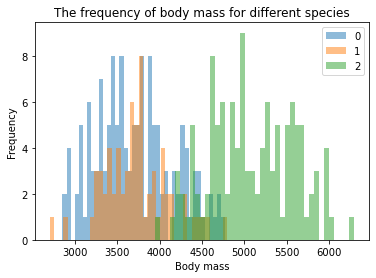

In [9]:
fig,ax=plt.subplots(1)

species=penguins["Species"].unique()
spec={
    0:"Adelie",
    1:"Chinstrap",
    2:"Gentoo"
}
for x in species:
    y=penguins[penguins["Species"]==x]
    ax.hist(y["Body Mass (g)"],label=x,alpha=.5,bins=40)

ax.set(xlabel="Body mass",ylabel="Frequency",
       title="The frequency of body mass for different species")
ax.legend()

From the above we can see a large overlap of total body mass between multiple species of penguin, this provides the implication that body mass will not be beneficial as a characteristic to designate our penguins later on. 

**We will create a separated dataframe, n, to use for a graph comparing Flipper Length and Culmen Length separated by sex and species.**

In [10]:
n=penguins.groupby(["Sex","Species",
                    "Flipper Length (mm)"])[["Culmen Length (mm)"]].mean()
n

Culmen Length (mm)
Sex Species Flipper Length (mm)                    
0   0       172.0                         37.900000
            174.0                         37.800000
            176.0                         40.200000
            178.0                         36.300000
            180.0                         42.200000
...                                             ...
1   2       226.0                         50.800000
            228.0                         52.000000
            229.0                         49.650000
            230.0                         52.385714
            231.0                         54.300000

[117 rows x 1 columns]

**In this set of line plots, we will explore the relation of Flipper Length against Culmen Length separated by the three species of penguin, as well as between both sexes.**

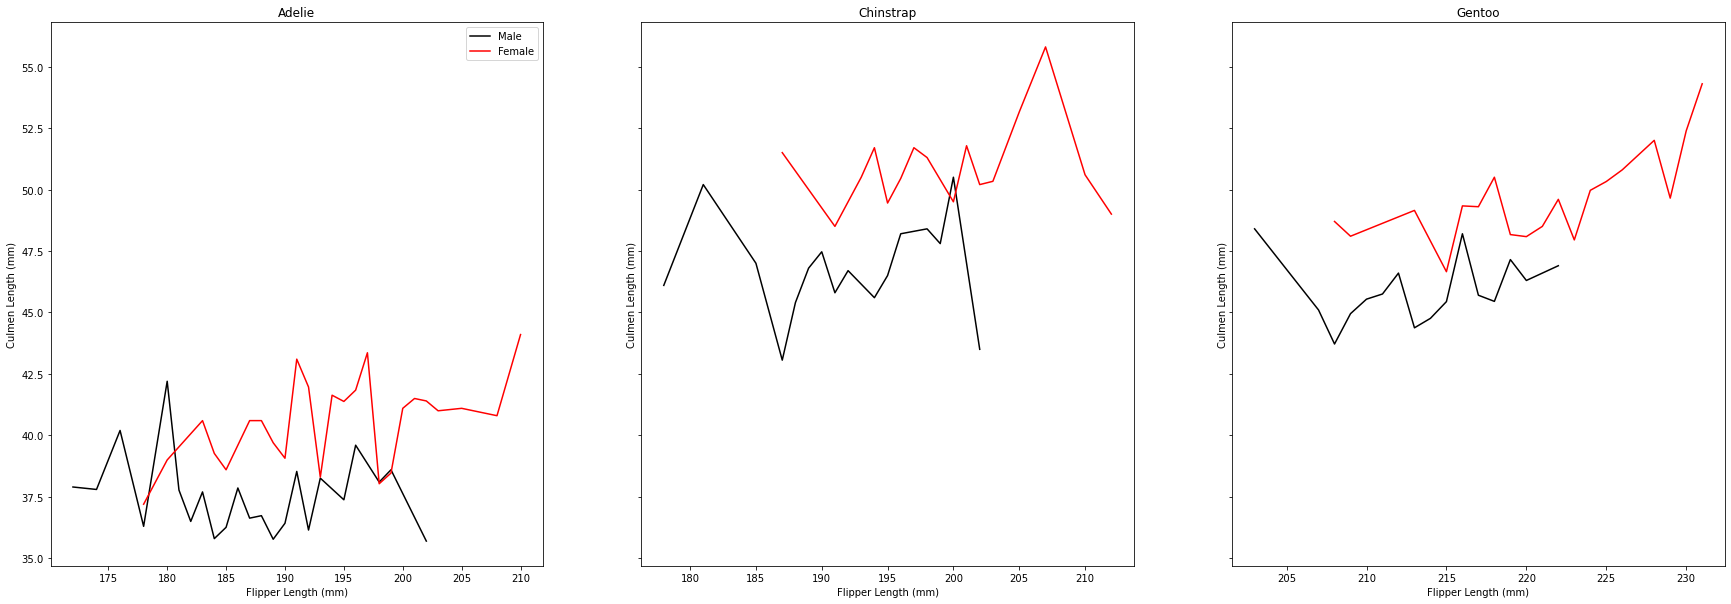

In [11]:
fig,ax=plt.subplots(1,3,figsize=(30,10),sharey=True)


Species_name={0:"Adelie",1:"Chinstrap",2:"Gentoo"}
for s in Species_name.keys():
    
    ax[s].plot(n.loc[0].loc[s],label="Male",color="black")
    ax[s].plot(n.loc[1].loc[s],label="Female",color="red")
    ax[s].set(xlabel="Flipper Length (mm)",ylabel="Culmen Length (mm)")
    
    ax[s].set(title=Species_name[s])

ax[0].legend()      


The general trends of these graphs show that within each species, these two measurements (Flipper Length and Culmen Length) tend to follow similar ranges amongst both male and female penguins of the species. However, between each species these measurements tend to have different ranges, with Adelie penguins having shorter Culmen Lengths, Gentoo penguins having longer Flipper Lengths and Chinstrap penguins falling somewhere in between the two.

**We will create a grid of scatterplots that plots varying characteristics against eachother, we will choose the numerical characteristics of interest from the graphs above (Flipper Length, Body Mass, Culmen Length, and Culmen Depth). We will also provide the correlation coefficient of the data.**

In [12]:
def scatterplot_matrix(cols,dataset, figsize):
    # number of rows and columns of axes
    n = len(cols)

    # initialize axes
    fig, ax = plt.subplots(n, n, figsize=figsize)
  
    # loop first over the rows
    for i in range(n):
        # add the label corresponding to the row as the vertical label
        for j in range(n):
            # add label as the title (above the plot)
            ax[i,j].set(title = cols[i], ylabel = cols[j])
            # ignores the diagonal
            if i != j:
                # add the scatter plot
                ax[i,j].scatter(dataset[cols[i]], dataset[cols[j]],s=5)
                #compute the correlation coefficient
                rho = np.corrcoef(dataset[cols[i]], dataset[cols[j]])[0,1]
                #add the correlation coefficient as a horizontal axis label
                ax[i,j].set(xlabel = r"$\rho = $" + str(np.round(rho, 2)))
    # adjust for squished plots
    plt.tight_layout()


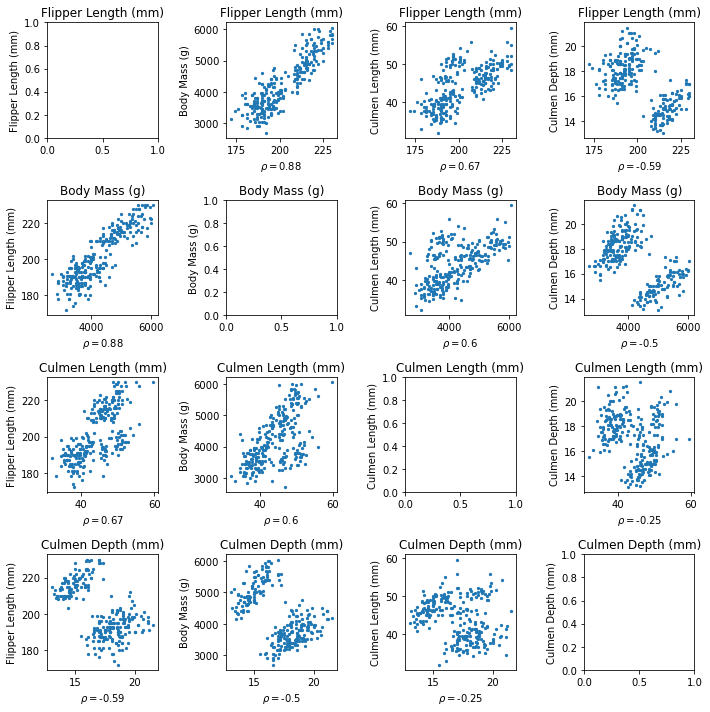

In [13]:
colm=["Flipper Length (mm)","Body Mass (g)",
      'Culmen Length (mm)', 'Culmen Depth (mm)']
scatterplot_matrix(colm,X_train,figsize=(10,10))

This graph shows the relationship between two measurements. The correlation coefficient provided above shows how related the points in the graph are to eachother. For our purpose of finding distinct groups we will look closer at the graphs that produce a low coefficient (close to zero), as these comparisons may be easier to divide into groups for our modeling. From the above we can see that the closest coefficient is comparing Culmen Length and Culmen Depth.

## Feature Selection

Below is a list of varying measurements consisting of one qualitative and two quantitative measurements in each group, derived by analysis of the graphs above. We focus primarily comparing Culmen Length and Culmen Depth as our quantitative data, however, we will include other measurements to ensure diversity in test. We will use this list to test varying measurements and choose one as our main features to test.

We will also use this section to establish our functions for checking cross validation score, the model score, as well as the decision region plotting function.

In [14]:

from sklearn.model_selection import cross_val_score

combos=[["Sex","Culmen Length (mm)","Culmen Depth (mm)"],
        ["Island","Culmen Length (mm)","Culmen Depth (mm)"],
        ["Sex","Flipper Length (mm)","Body Mass (g)"],
        ["Sex","Culmen Length (mm)","Body Mass (g)"],
        ["Island","Flipper Length (mm)","Body Mass (g)"],
        ["Island","Culmen Depth (mm)","Body Mass (g)"]]

In [15]:
def check_column_score(cols,model):
    print("training with columns "+ str(cols))
    
    model.fit(X_train[cols],y_train)
    
    return cross_val_score(model,X_train[cols],y_train,cv=5).mean()



In [16]:
def test_column_score(cols,model):
    print("training with cols "+ str(cols))
    model.fit(X_train[cols],y_train)
    return model.score(X_test[cols],y_test)



In [17]:
def plot_regions(c,X,y,index):
    """
    Plots the decision regions of a classifier
    c: the classifier
    X: predictor variables
    y: target variable
    """
    x0=X["Culmen Length (mm)"]
    x1=X["Culmen Depth (mm)"]
    
    #fit model
    c.fit(X,y)


   
    grid_x=np.linspace(x0.min(),x0.max(),501)
    grid_y=np.linspace(x1.min(),x1.max(),501)
    xx,yy=np.meshgrid(grid_x,grid_y)


    
    XX=xx.ravel()
    YY=yy.ravel()
    
    #make predictions
    p=c.predict(np.c_[XX,YY])

    #reshape p back into a 2d array
    p=p.reshape(xx.shape)

    fig,ax = plt.subplots(1) #creates the fig and the ax 
    ax.contourf(xx,yy,p,cmap="jet",alpha=.2) 
    #this plots the decision boundaries
    
    ax.scatter(x0[index],x1[index],c=y[index],cmap="jet") #this plots the points
    
    #labeling our axis
    ax.set(xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)")
    
    
    

# Modeling

## Model 1 
**We will use the RandomForestClassifier model.
In this one, the ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] had a highest score (Given we are ignoring Body Mass as a measurement). We also use this three features to train the model.**

In [112]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
for combo in combos:
    x=check_column_score(combo,RF)
    print(str(np.round(x,3)))

training with columns ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
0.985
training with columns ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
0.984
training with columns ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']
0.791
training with columns ['Sex', 'Culmen Length (mm)', 'Body Mass (g)']
0.992
training with columns ['Island', 'Flipper Length (mm)', 'Body Mass (g)']
0.872
training with columns ['Island', 'Culmen Depth (mm)', 'Body Mass (g)']
0.822


 **Use the ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] to train the RF model.
Find the score for ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] in this model.**

In [113]:
RF.fit(X_train[['Sex', 'Culmen Length (mm)', 
                'Culmen Depth (mm)']],y_train)
RF.score(X_train[['Sex', 'Culmen Length (mm)', 
                  'Culmen Depth (mm)']],y_train)

1.0

 **To avoid overfiiting, use the cross-validation to check.**
 

In [114]:
cv_scores=cross_val_score(RF,X_train[['Sex',
                                      'Culmen Length (mm)',
                                      'Culmen Depth (mm)']],y_train,cv=5)
cv_scores.mean()

0.9806184012066366

This score is very high.

**Run the model on the test sets.**

In [115]:
RF.score(X_test[['Sex', 'Culmen Length (mm)',
                 'Culmen Depth (mm)']],y_test)

0.9696969696969697

**We will now use the model to try to predict the species, then use the result in our confusion matrix.**

In [116]:
y_train_pred=RF.predict(X_train[['Sex', 
                                 'Culmen Length (mm)', 'Culmen Depth (mm)']])

In [117]:
c=confusion_matrix(y_train,y_train_pred)
c

array([[109,   0,   0],
       [  0,  51,   0],
       [  0,   0,  98]], dtype=int64)

The model was able to correctly predict the species of each given penguin.

**We will now display the decision regions for the model, separated by male and female.**

This plot corresponds to the male penguins (Sex=0).

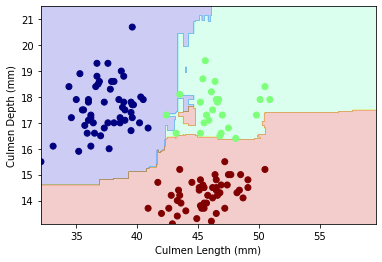

In [118]:
RFindex1 =X_train[X_train["Sex"]==0].index
plot_regions(RF,X_train[["Culmen Length (mm)",
                         "Culmen Depth (mm)"]],y_train,RFindex1)

This plot corresponds to the female penguins (Sex=1).

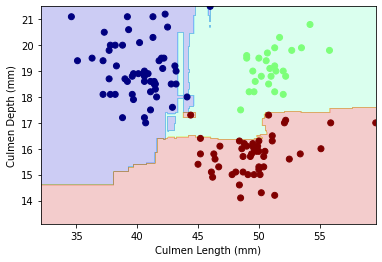

In [119]:
RFindex2 =X_train[X_train["Sex"]==1].index
plot_regions(RF,X_train[["Culmen Length (mm)",
                         "Culmen Depth (mm)"]],y_train,RFindex2)

# Model 2
**In this model we will implement LogisticRegression.**

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

**We will set the Logistic Regression with max iterator 2000. Then, we will divide the data into 5 to avoid overfitting, and compute the cross validation score.**

In [121]:
LR=LogisticRegression(max_iter=2000)
cross_val_score(LR,X_train,y_train,cv=5).mean()

0.9922322775263952

**We will compute the best c value to use in our Logistic Regression with the model below.**

In [122]:
C_pool=np.linspace(0.005,.05,10)
best_score=-np.inf

for c in C_pool:
    LR=LogisticRegression(C=c,max_iter=10000)
    score=cross_val_score(LR,X_train,y_train,cv=5).mean()
    if score>best_score:
        best_score=score
        best_c=c
    print("C= ",np.round(c,3)," Cross Val Score = ", score)

C=  0.005  Cross Val Score =  0.9649321266968325
C=  0.01  Cross Val Score =  0.9766214177978885
C=  0.015  Cross Val Score =  0.9844645550527904
C=  0.02  Cross Val Score =  0.9883107088989442
C=  0.025  Cross Val Score =  0.9921568627450981
C=  0.03  Cross Val Score =  0.9921568627450981
C=  0.035  Cross Val Score =  0.9921568627450981
C=  0.04  Cross Val Score =  0.9921568627450981
C=  0.045  Cross Val Score =  0.9921568627450981
C=  0.05  Cross Val Score =  0.9921568627450981


**We will use the best c value found above to use in our Logistic Regression. The output is a value much closer to 1.**

In [123]:
LR1=LogisticRegression(C=best_c,max_iter=10000)
LR1.fit(X_train,y_train)
LR1.score(X_test,y_test)

0.9848484848484849

**Using the best generated Logistic Regression, we will compute the confusion matrix**

In [124]:
y_train_pred1=LR1.predict(X_train)
r=confusion_matrix(y_train,y_train_pred1)
r

array([[109,   0,   0],
       [  1,  50,   0],
       [  0,   0,  98]], dtype=int64)

We can see that the model incorrectly predicted one value in the matrix above, this model is still fairly accurate. 

**We will display the decision regions below, separated between male and female.**

This plot corresponds to the male penguins (Sex=0).

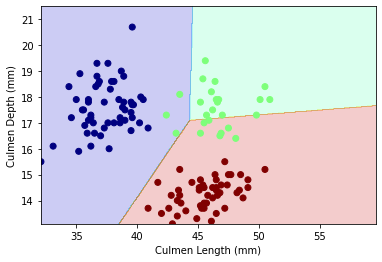

In [125]:
LRindex1=X_train[X_train["Sex"]==0].index
plot_regions(LR1,X_train[["Culmen Length (mm)",
                          "Culmen Depth (mm)"]],y_train,LRindex1)

This plot corresponds to the female penguins (Sex=1).

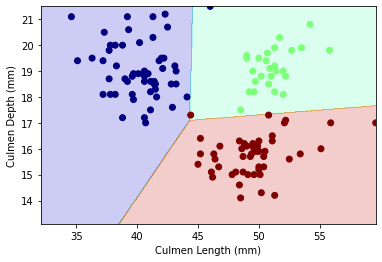

In [126]:
LRindex2 =X_train[X_train["Sex"]==1].index
plot_regions(LR1,X_train[["Culmen Length (mm)",
                          "Culmen Depth (mm)"]],y_train,LRindex2)

## Model 3

### **In this model we will implement the KNeighborsClassifier model.**

**We begin with copying our data, since we will need to modify it throughout this model.**

In [127]:
KNX_train=X_train.copy()
KNy_train=y_train.copy()
KNX_test=X_test.copy()
KNy_test=y_test.copy()

**To use the KNeighborsClassifier, we will have to use the StandardScaler import to modify our data.**

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(KNX_train)

KNX_train = scaler.transform(KNX_train)
KNX_test = scaler.transform(KNX_test)

**Run the KNeighborsClassifier model with n_neighbors set to three.**

In [129]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(KNX_train, KNy_train)

KNeighborsClassifier(n_neighbors=3)

**We will use this model to predict our values and apply a confusion matrix.**

In [130]:
y_pred = classifier.predict(KNX_test)

In [131]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(KNy_test, y_pred))

[[30  0  0]
 [ 0 16  0]
 [ 0  0 20]]


We can see the model predicts the values correctly.

**Below we will use the classification_report from KNeighborsClassifier to find the overall accuracy of the model.**

In [132]:
print(classification_report(KNy_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        20

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



The classification report shows 100% accuracy.

**We will now plot the models decision regions, separating between male and female penguins.**

This plot corresponds to the male penguins (Sex=0).

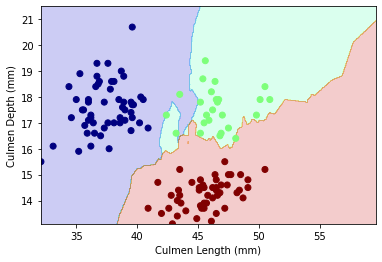

In [133]:
KNindex1 =X_train[X_train["Sex"]==0].index
plot_regions(classifier,X_train[["Culmen Length (mm)",
                                 "Culmen Depth (mm)"]],y_train,KNindex1)

This plot corresponds to the female penguins (Sex=1).

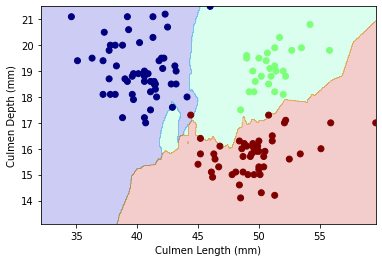

In [134]:
KNindex2 =X_train[X_train["Sex"]==1].index
plot_regions(classifier,X_train[["Culmen Length (mm)",
                                 "Culmen Depth (mm)"]],y_train,KNindex2)

# Discussion

All three of our models were very accurate and predicted the correct species with nearly perfect accuracy. Our first two models had around 98% accuracy with the test sets, and the third model had 100% percent accuracy which may reflect overfitting of the data. With models 1 and 3, we can see that the decision regions leaked into other color regions while trying to correctly label the points, which may reflect overfitting. In model 2 and 3, we can see that some of the green (Chinstrap) points have 'leaked' into the other regions, thus being incorrectly classified.  



Overall, the high value results we received from our tests sets may reflect the overfitting of our models, which also showed up in our decision regions. We also may have accrued error by choosing our best features by using our data exploration graphs, instead of performing an automated feature selection that would have run through all combinations possible. Choosing a shorter list to analyze may have limited the accuracy of our models, and therefore impacted our overall decision regions. 

Overall, our confusion matrices displayed minor error in our models predictions. Despite the possible inaccuracies from our selected variables, our models preformed well on the given training and test sets, ultimately proving successful in predicting the species of the penguins.